# Reto Vespa Velupina

## 1. Librerías

In [2]:
# Eliminar avisos
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Librerías
#----------------------------------#
# Librerías de tratamiento de datos
import pandas as pd
import numpy as np
import chardet
from functools import reduce

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías de environment
from sinfo import sinfo

sinfo()

-----
chardet     4.0.0
matplotlib  3.3.4
numpy       1.19.2
pandas      0.25.3
seaborn     0.11.1
sinfo       0.3.1
-----
IPython             7.20.0
jupyter_client      6.1.7
jupyter_core        4.7.1
jupyterlab          2.2.6
notebook            6.2.0
-----
Python 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19041-SP0
12 logical CPU cores, Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
-----
Session information updated at 2021-03-27 19:27


## 2. Plantilla y Datos

In [4]:
plantilla = pd.read_csv('PLANTILLA-RETO-AVISPAS-KOPURU.csv', sep = ';')
plantilla

,CODIGO MUNICIPIO,NOMBRE MUNICIPIO,NIDOS 2020
0,48001,Abadiño,NaN
1,48002,Abanto y Ciérvana-Abanto Zierbena,NaN
2,48911,Ajangiz,NaN
3,48912,Alonsotegi,NaN
4,48003,Amorebieta-Etxano,NaN
...,...,...,...
107,48097,Zaratamo,NaN
108,48024,Zeanuri,NaN
109,48025,Zeberio,NaN
110,48913,Zierbena,NaN


In [5]:
Localiz_estaciones = pd.read_csv('LOCALIZACION-ESTACIONES-METEOROLOGICAS.csv', sep = ';')
Localiz_estaciones

,CODIGO,ESTACION,TIPO,XUTM,YUTM,cota (m)
0,C076,Abetxuko,A,527154,4747039,510
1,C056,Alegria,A,538992,4743676,545
2,C035,Altube,M,510880,4757063,618
3,C0A3,Antoñana,A,549965,4725290,573
4,C001,Arkaute,M,530608,4744631,517
...,...,...,...,...,...,...
97,C007,Santa Clara,M,581216,4797047,48
98,C0D0,Urkulu,A,543083,4762471,340
99,C064,Zarautz,M,569393,4793780,80
100,C028,Zegama,M,557322,4756460,520


In [6]:
frutales = pd.read_csv('FRUTALES-DECLARADOS-KOPURU.csv', sep = ';')
frutales

,PRODUCTODES_C,CODIGO MUNICIPIO,NOMBRE LOCALIDAD
0,FRUTALES,48009,Arrankudiaga
1,FRUTALES,48025,Zeberio
2,FRUTALES,48025,Zeberio
3,FRUTALES,48060,Markina-Xemein
4,FRUTALES,48011,Arrigorriaga
...,...,...,...
4399,VI•EDO DE TXAKOLI,48012,Bakio
4400,VI•EDO DE TXAKOLI,48012,Bakio
4401,FRUTALES,48025,Zeberio
4402,FRUTALES,48907,Kortezubi


In [81]:
Apicultura = pd.read_csv('APICULTURA_COLMENAS_KOPURU.csv', sep = ';')
Apicultura

,NOMBRE MUNICIPIO,CP,CODIGO MUNICIPIO,NUM_COLMENAS
0,Alonsotegi,48810,48912,40
1,Alonsotegi,48810,48912,80
2,Alonsotegi,48810,48912,80
3,Balmaseda,48800,48090,40
4,Balmaseda,48800,48090,40
...,...,...,...,...
98,Bermeo,48370,48017,40
99,Bilbao,48009,48020,60
100,Bilbao,48009,48020,40
101,Bilbao,48009,48020,40


### 2.1. Datos anuales

In [8]:
archivos = [
    'DÍAS DE HELADA ',
    'DÍAS DE PRECIPITACIÓN ',
    'DÍAS DE PRECIPITACIÓN IGUAL O SUPERIOR A 1 mm ',
    'HUMEDAD MEDIA DIARIA (%) ',
    'IRRADIACIÓN MEDIA DIARIA (MJm2) ',
    'MEDIA DE LAS VELOCIDADES MÁXIMAS (kmh) ',
    'NIVEL MÁXIMO (m) ',
    'NIVEL MEDIO (m) ',
    'PRECIPITACIÓN ACUMULADA (lm2) ',
    'PRECIPITACIÓN MÁXIMA EN 10 MINUTOS (lm2) ',
    'PRECIPITACIÓN MÁXIMA EN UN DÍA (lm2) ',
    'TEMPERATURA MÁXIMA ABSOLUTA (ºC) ',
    'TEMPERATURA MÁXIMA MEDIA (ºC) ',
    'TEMPERATURA MEDIA (ºC) ',
    'TEMPERATURA MÍNIMA ABSOLUTA (ºC) ',
    'TEMPERATURA MÍNIMA MEDIA (ºC) ',
    'VELOCIDAD DE LA RACHA MÁXIMA (kmh) ',
    'VELOCIDAD MEDIA (kmh) ',
    'NIVEL MÍNIMO (m) '
]
path = 'CSV ESTACIONES'
Años = ['2016', '2017','2018','2019']

Se descubre la codificación de los archivos.

In [9]:
# Codificación de los archivos csv
with open('CSV 2016 ESTACIONES/DÍAS DE HELADA 2016.csv',"rb") as f:
    data = f.read()
    print(chardet.detect(data))

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}


Ahora se cargan los datos.

In [10]:
# Carga de datos  climatológicos
#---------------------------------------------#
# Se crea un diccionario vacía
Año = {}
for i in Años:
    # Para cada año se crea una lista
    Año['Año_{}'.format(i)] = []
    path_año = path[:4]+i+' '+path[4:]
    for j in archivos:
        archivo_año = j+i
        # Se define el path del archivo
        path_archivo = path_año+'/'+archivo_año+'.csv'
        # Se trata la excepción en el nombre para 2017
        if path_archivo == 'CSV 2017 ESTACIONES/NIVEL MÁXIMO (m) 2017.csv':
            path_archivo = 'CSV 2017 ESTACIONES/NIVEL MÁXIMO (m).csv'
        
        try:
            #Se crea la lista de dataframes con todos los datos del año
            Año['Año_{}'.format(i)].append(pd.read_csv(path_archivo, sep = ';', encoding = 'UTF-8-SIG'))
        except:
            # Se expone el archivo que no está presente antes de 2019
            print(path_archivo)

CSV 2016 ESTACIONES/NIVEL MÍNIMO (m) 2016.csv
CSV 2017 ESTACIONES/NIVEL MÍNIMO (m) 2017.csv
CSV 2018 ESTACIONES/NIVEL MÍNIMO (m) 2018.csv


In [11]:
Año['Año_2016'][0]

,COD.,ESTACION,cota (m),ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SET,OCT,NOV,DIC,SUMA
0,NaN,NaN,NaN,NaN,NaN,NaN,DÍAS DE HELADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KOD.,ESTAZIOA,kota (m),URT,OTS,MAR,API,MAI,EKA,UZT,ABU,IRA,URR,AZA,ABE,BATURA
2,C076,Abetxuko,510,9,9,3,3,0,0,0,0,0,1,2,10,37
3,C056,Alegria,545,8,9,3,3,1,0,0,0,0,2,3,13,42
4,C035,Altube,618,5,4,0,3,1,0,0,0,0,0,0,6,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,C064,Zarautz,80,0,0,0,0,0,0,0,0,0,0,0,0,0
97,C028,Zegama,520,0,2,0,0,0,0,0,0,0,0,0,0,2
98,C029,Zizurkil,149,0,1,0,0,0,0,0,0,0,0,0,0,1
99,COD.,ESTACION,cota (m),ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SET,OCT,NOV,DIC,SUMA


In [12]:
Nidos = pd.read_csv('datos-nidos-avispa-asiatica.csv')
Nidos

,_id,URTEA/ANIO,JARDUERA_ZENBAKIA/NUM_ACTUACION,ALTA_DATA/FECHA ALTA,ERABILTZAILEA_EU/USUARIO_EU,ERABILTZAILEA_CAS/USUARIO_CAS,UDALERRIA/MUNICIPIO,HELBIDEA/DIRECCION,ESPEZIE/ESPECIE,KOKALEKUA/UBICACION,ALTUERA/ALTURA,DIAMETROA/DIAMETRO,longitude,latitude,EGOERA_EU/ESTADO_EU,EGOERA_CAS/ESTADO_CAS,ITXIERA_DATA/FECHA CIERRE,ITXIERAKO AGENTEA_EU/AGENTE CIERRE_EU,ITXIERAKO AGENTEA_CAS/AGENTE CIERRE_CAS
0,1,2019,214,2019-07-06 00:00:00,ABADIÑOKO UDALA,AYUNTAMIENTO ABADIÑO,ABADIÑO,OLALDE,AVISPA ASIÁTICA,CONSTRUCCIÓN,0.0,1.0,"532124,0816","4777436,519",ITXITA - EZABATUTA,CERRADA - ELIMINADO,2019-06-15 00:00:00,SUHILTZAILEAK,BOMBEROS
1,2,2019,22,2019-03-25 00:00:00,BASALAN,BASALAN,ABADIÑO,MCDONALD'S ABADIÑO,AVISPA ASIÁTICA,CONSTRUCCIÓN,8.0,10.0,"531000,5783","4779715,773",ITXITA - EZABATUTA,CERRADA - ELIMINADO,2019-03-25 00:00:00,BASALAN,BASALAN
2,3,2019,434,2019-08-07 00:00:00,ABADIÑOKO UDALA,AYUNTAMIENTO ABADIÑO,ABADIÑO,GEREDIAGA AUZOA 2,AVISPA COMÚN,CONSTRUCCIÓN,2.0,2.0,"532159,4404","4779313,024",ITXITA - EZABATUTA,CERRADA - ELIMINADO,2019-09-07 00:00:00,SUHILTZAILEAK,BOMBEROS
3,4,2019,565,2019-07-20 00:00:00,ABADIÑOKO UDALA,AYUNTAMIENTO ABADIÑO,ABADIÑO,MUNTSARATZ Nº 19 A,AVISPA ASIÁTICA,CONSTRUCCIÓN,4.0,20.0,"532457,6901","4777072,989",ITXITA - EZABATUTA,CERRADA - ELIMINADO,2019-07-20 00:00:00,SUHILTZAILEAK,BOMBEROS
4,5,2019,766,2019-06-08 00:00:00,ABADIÑOKO UDALA,AYUNTAMIENTO ABADIÑO,ABADIÑO,ARRANKURRI KALEA 58,AVISPA ASIÁTICA,ARBOLADO,10.0,30.0,"531388,7069","4777964,231",ITXITA - EZABATUTA,CERRADA - ELIMINADO,2019-06-08 00:00:00,SUHILTZAILEAK,BOMBEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6785,6786,2019,1569,2019-01-10 00:00:00,BASALAN,BASALAN,ZIORTZA-BOLIBAR,ASTARLO BASERRIA,AVISPA ASIÁTICA,CONSTRUCCIÓN,6.0,10.0,NaN,NaN,ITXITA - EZABATUTA,CERRADA - ELIMINADO,2019-01-10 00:00:00,BASALAN,BASALAN
6786,6787,2018,1888,2018-08-23 00:00:00,ZIORTZA-BOLIBARKO UDALA,AYUNTAMIENTO ZIORTZA-BOLIBAR,ZIORTZA-BOLIBAR,IRUZUBIETA-OLALDIA BASERRIA,AVISPA ASIÁTICA,ARBOLADO,10.0,50.0,NaN,NaN,ITXITA - EZIN DA EZABATU,CERRADA - NO ELIMINABLE,2018-08-28 00:00:00,BASALAN,BASALAN
6787,6788,2018,1476,2018-07-08 00:00:00,SUHILTZAILEAK,BOMBEROS,ZIORTZA-BOLIBAR,"UREZANDI, 1",AVISPA ASIÁTICA,CONSTRUCCIÓN,2.0,15.0,"504669,9582","4794126,682",ITXITA - EZABATUTA,CERRADA - ELIMINADO,2018-09-08 00:00:00,BASALAN,BASALAN
6788,6789,2018,1877,2018-08-23 00:00:00,ZIORTZA-BOLIBARKO UDALA,AYUNTAMIENTO ZIORTZA-BOLIBAR,ZIORTZA-BOLIBAR,"ARTA AUZOA, 23 EZK. MONTE BASERRIA",AVISPA COMÚN,CONSTRUCCIÓN,5.0,50.0,NaN,NaN,ITXITA - EZABATUTA,CERRADA - ELIMINADO,2018-08-28 00:00:00,SUHILTZAILEAK,BOMBEROS


## 3. Procesamiento y limpieza de datos

In [13]:
# Procesamiento del archivo de nidos de avispa asiática retirados
#---------------------------------------------------------------#
# Reescribir nombres de columna importantes
Nidos.rename(columns = {
    'URTEA/ANIO': 'Año',
    'UDALERRIA/MUNICIPIO': 'Municipio',
    'ESPEZIE/ESPECIE': 'Especie',
}, inplace = True)

# Selección de las columnas
Nidos = Nidos[['Año','Municipio','Especie']]

# Seleccionar especie de avispa asiática
Nidos = Nidos[Nidos['Especie'] == 'AVISPA ASIÁTICA'].reset_index(drop = True)

# Crear lista de municipios de acuerdo a la plantilla y lista de municipios en minúscula
Mun = plantilla['NOMBRE MUNICIPIO'].unique().tolist()
mun = plantilla['NOMBRE MUNICIPIO'].str.lower().unique().tolist()

# Corregir ciertos caracteres
Nidos['Municipio'] = Nidos['Municipio'].str.strip()
Nidos['Municipio'][Nidos['Municipio'] == 'ABANTO Y CIERVANA'] = 'ABANTO Y CIÉRVANA-ABANTO ZIERBENA'
Nidos['Municipio'][Nidos['Municipio'] == 'ABANTO Y CIERVANA-ABANTO ZIERBENA'] = 'ABANTO Y CIÉRVANA-ABANTO ZIERBENA'
Nidos['Municipio'][Nidos['Municipio'] == 'GUEÑES'] = 'GÜEÑES'
Nidos['Municipio'][Nidos['Municipio'] == 'KARRANTZA HARANA-VALLE DE CARRANZA'] = 'KARRANTZA HARANA/VALLE DE CARRANZA'
Nidos['Municipio'][Nidos['Municipio'] == 'URDUÑA-ORDUÑA'] = 'URDUÑA/ORDUÑA'
Nidos['Municipio'][Nidos['Municipio'] == 'VALLE DE TRAPAGA-TRAPAGARAN'] = 'VALLE DE TRÁPAGA-TRAPAGARAN'

# Normalizar nombre de los municipios
for i in Nidos['Municipio'].tolist():
    if i.lower() in mun:
        Nidos['Municipio'][Nidos['Municipio'] == i] = Mun[mun.index(i.lower())]
        
# Eliminar las mayúsculas
Nidos['Especie'] = Nidos['Especie'].str.lower()

# Nidos eliminados por municipio y año
Nidos['Especie'] = Nidos['Especie'].map({'avispa asiática': 1})
num_Nidos = Nidos.groupby(['Año','Municipio']).agg('sum').unstack()['Especie'].transpose()
num_Nidos.reset_index(level = 0, inplace = True)
del num_Nidos.index.name

# DataFrame final
num_Nidos = pd.melt(num_Nidos, id_vars = 'Municipio',
       var_name = 'Año',
       value_name = 'Nidos')

In [14]:
num_Nidos

,Municipio,Año,Nidos
0,Abadiño,2017,NaN
1,Abanto y Ciérvana-Abanto Zierbena,2017,NaN
2,Ajangiz,2017,NaN
3,Alonsotegi,2017,4.0
4,Amorebieta-Etxano,2017,4.0
...,...,...,...
328,Zaratamo,2019,10.0
329,Zeanuri,2019,22.0
330,Zeberio,2019,17.0
331,Zierbena,2019,6.0


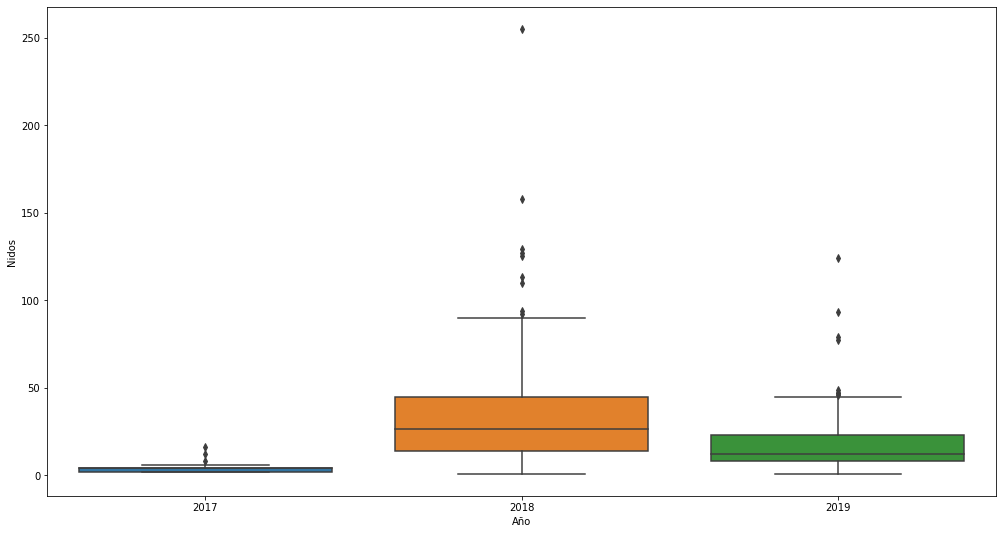

In [38]:
fig, ax = plt.subplots(figsize = (17,9))
sns.boxplot(data = num_Nidos, x = num_Nidos['Año'], y = num_Nidos['Nidos']);

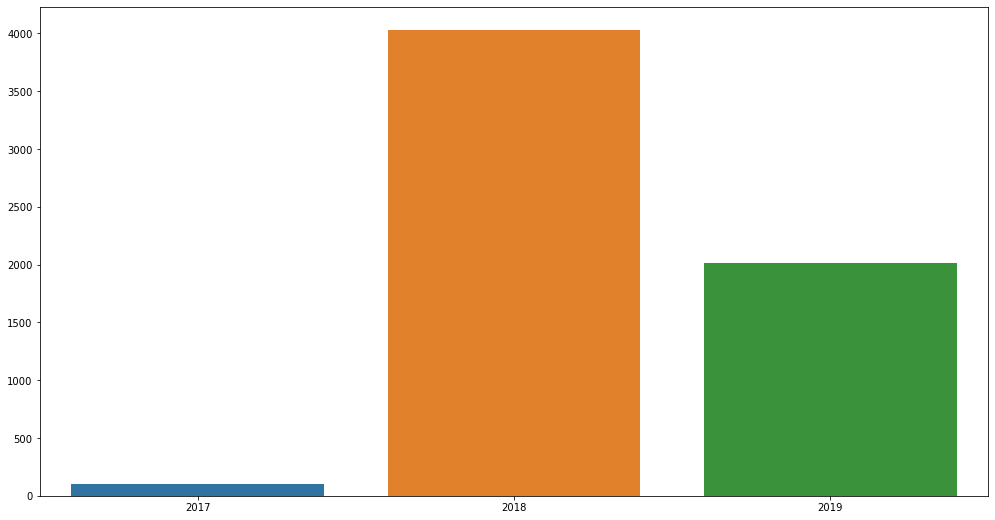

In [39]:
fig, ax = plt.subplots(figsize = (17,9))
sns.barplot(x = num_Nidos.groupby('Año').sum().index.tolist(), y = num_Nidos.groupby('Año').sum().values.reshape(-1));

In [36]:
# Procesamiento del archivo de explotaciones frutales
#---------------------------------------------------#
# Renombrar columnas importantes
frutales.rename(columns = {
    'PRODUCTODES_C': 'Producto',
    'NOMBRE LOCALIDAD': 'Municipio'
}, inplace = True)

# Selección de columnas
frutales = frutales[['Producto', 'Municipio']]

# Corregir los nombres de producto
frutales['Producto'][frutales['Producto'] == 'VI•EDO DE TXAKOLI'] = 'VIÑEDO DE TXAKOLI'
frutales['Producto'][frutales['Producto'] == 'AKTINIDIA (KIWI)'] = 'KIWI'
frutales['Producto'] = frutales['Producto'].str.lower()

# Productos por municipio
frutales = pd.DataFrame(frutales.groupby('Municipio').Producto.value_counts()).unstack()['Producto'].reset_index(level = 0)

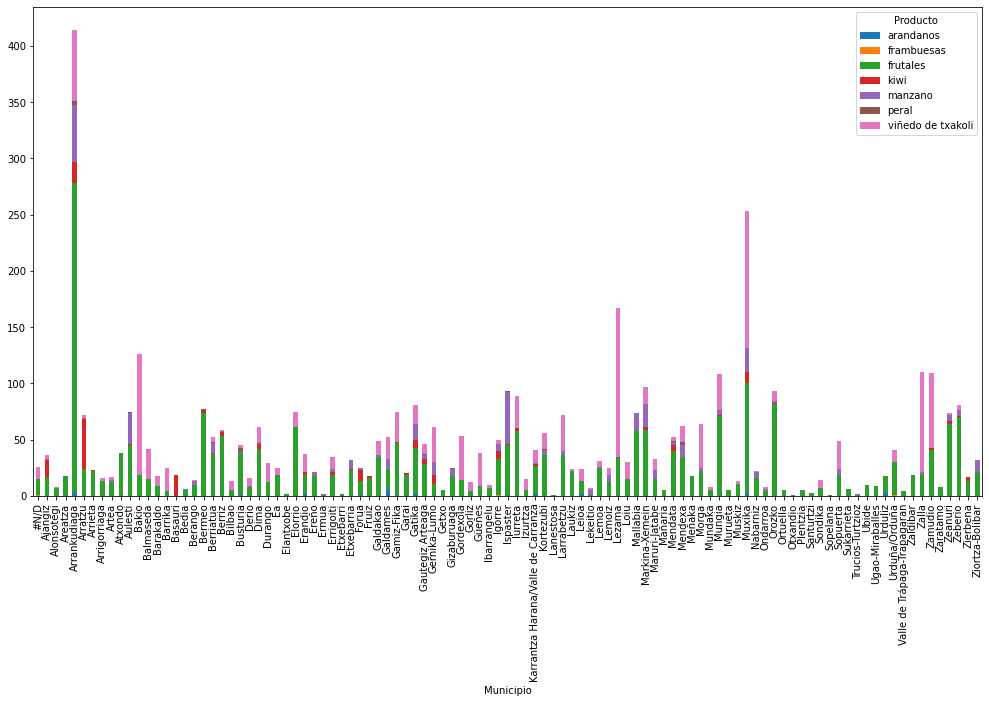

In [37]:
frutales.plot(x = 'Municipio', kind = 'bar', stacked = True, figsize = (17,9));

In [82]:
# Procesamiento de datos de apicultura
#------------------------------------#
# Renombrar columnas importantes
Apicultura.rename(columns = {
    'NOMBRE MUNICIPIO': 'Municipio',
    'NUM_COLMENAS': 'Colmenas'
}, inplace = True)

# Selección de columnas
Apicultura = Apicultura[['Municipio', 'Colmenas']]

# Número de explotaciones por municipio
num_Exp = Apicultura.Municipio.value_counts()

# Número de colmenas y de explotaciones por municipio
Apicultura = pd.DataFrame(Apicultura.groupby('Municipio').sum()['Colmenas'])
Apicultura['Número de explotacioines'] = num_Exp
Apicultura.reset_index(level = 0, inplace = True)

# Ordenar el dataframe
Apicultura = Apicultura.sort_values(by = 'Colmenas', ascending = False).reset_index(drop = True)

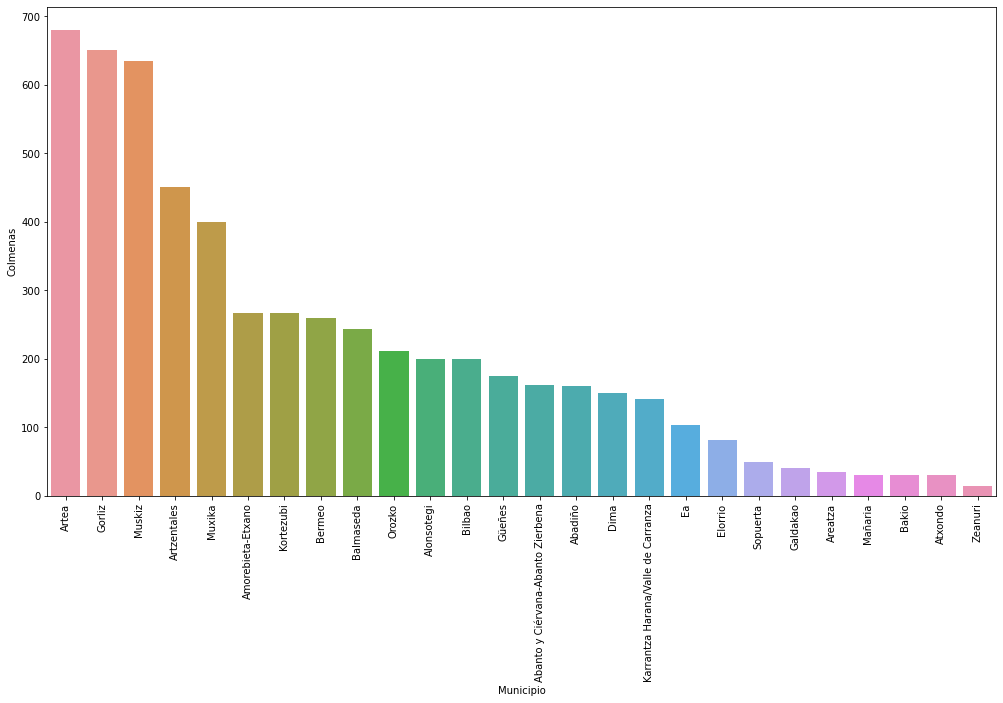

In [83]:
fig, ax = plt.subplots(figsize = (17,9));
fig = sns.barplot(data = Apicultura, x = 'Municipio', y = 'Colmenas');
plt.xticks(rotation = 90);

In [38]:
for i in Año.keys():
    for j in range(len(Año[i])):
        Año[i][j] = Año[i][j].dropna(subset = ['COD.'])
        Año[i][j] = Año[i][j][(Año[i][j]['COD.'] != 'KOD.')&(Año[i][j]['COD.'] != 'COD.')]
        Año[i][j] = Año[i][j].reset_index(drop = True)

In [39]:
for i in range(len(Años)):
    for j in range(len(Año[list(Año.keys())[i]])):
        Año[list(Año.keys())[i]][j].columns = ['cod', 'estacion', 'cota', 'enero', 'febrero', 'marzo','abril','mayo','junio',
                                               'julio','agosto','septiembre','octubre','noviembre','diciembre','tot']
        Año[list(Año.keys())[i]][j]['Año'] = Años[i]

In [44]:
Archivos_anuales = {}
Meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre',
         'diciembre','tot']
for i in range(len(Años)):
    Archivos_anuales['Año_{}'.format(Años[i])] = []
    for j in range(len(Año[list(Año.keys())[i]])):
        for k in range(len(Meses)):
            Archivos_anuales['Año_{}'.format(Años[i])].append(Año[list(Año.keys())[i]][j][['cod', 'estacion', 'cota',
                                                                                           'Año', Meses[k]]])
            try:
                Archivos_anuales['Año_{}'.format(Años[i])][13*j+k]['achiv'] = archivos[j]
            except:
                print(archivos[j])

In [46]:
Archivos_anuales['Año_2016'][11]

,cod,estacion,cota,Año,diciembre,achiv
0,C076,Abetxuko,510,2016,10,DÍAS DE HELADA
1,C056,Alegria,545,2016,13,DÍAS DE HELADA
2,C035,Altube,618,2016,6,DÍAS DE HELADA
3,C001,Arkaute,517,2016,14,DÍAS DE HELADA
4,C025,Beluntza,687,2016,5,DÍAS DE HELADA
...,...,...,...,...,...,...
92,C007,Santa Clara,48,2016,0,DÍAS DE HELADA
93,C0D0,Urkulu,340,2016,4,DÍAS DE HELADA
94,C064,Zarautz,80,2016,0,DÍAS DE HELADA
95,C028,Zegama,520,2016,0,DÍAS DE HELADA


In [47]:
for i in Archivos_anuales.keys():
    for j in range(len(Archivos_anuales[i])):
        for k in Archivos_anuales[i][j].columns:
            
            if k in Meses:
                Archivos_anuales[i][j]['Mes'] = k

In [17]:
def concatymerge(df):
    
    '''
    Función para concatenar los dataframes de distintos años y merger los que no.
    
        Parámetros:
            df (list): Lista de dataframes
        
        return:
            data (pandas.dataframe): Dataframe final
    '''
    
    df_2016_list = []
    df_2017_list = []
    df_2018_list = []
    df_2019_list = []
    
    for i in range(len(df)):
        if i == 0:
            df_2016_list.append(df[0].rename(columns = {df[0].columns[-2]: df[0]['achiv'][0]}).drop(['achiv','cota'],
                                                                                                    axis = 1))
            
        else:
            if df[i]['Año'][0] == '2016':
                df[i]['cota'] = df[i]['cota'].astype(int)
                df_2016_list.append(df[i].rename(columns = {df[i].columns[-2]: df[i]['achiv'][0]}).drop(['achiv','cota'], 
                                                                                                        axis = 1))
                
            elif df[i]['Año'][0] == '2017':
                df[i]['cota'] = df[i]['cota'].astype(int)
                df_2017_list.append(df[i].rename(columns = {df[i].columns[-2]: df[i]['achiv'][0]}).drop(['achiv','cota'],
                                                                                                        axis = 1))
                
            elif df[i]['Año'][0] == '2018':
                df[i]['cota'] = df[i]['cota'].astype(int)
                df_2018_list.append(df[i].rename(columns = {df[i].columns[-2]: df[i]['achiv'][0]}).drop(['achiv','cota'], 
                                                                                                        axis = 1))
                
            elif df[i]['Año'][0] == '2019':
                df_2019_list.append(df[i].rename(columns = {df[i].columns[-2]: df[i]['achiv'][0]}).drop(['achiv','cota'],
                                                                                                        axis = 1))
                
    df_2016 = reduce(lambda df1, df2: pd.merge(df1, df2, on = ['Año','cod']), df_2016_list)
    df_2017 = reduce(lambda df1, df2: pd.merge(df1, df2, on = ['Año','cod']), df_2017_list)
    df_2018 = reduce(lambda df1, df2: pd.merge(df1, df2, on = ['Año','cod']), df_2018_list)
    df_2019 = reduce(lambda df1, df2: pd.merge(df1, df2, on = ['Año','cod']), df_2019_list)
    
    Df = [df_2016, df_2017, df_2018, df_2019]
    data = pd.concat(Df)
    
    return data

In [95]:
enero = concatymerge(Enero)

AssertionError: Number of manager items must equal union of block items
# manager items: 24, # tot_items: 40

In [48]:
Archivos_anuales['Año_2016'][0]

,cod,estacion,cota,Año,enero,achiv,Mes
0,C076,Abetxuko,510,2016,9,DÍAS DE HELADA,enero
1,C056,Alegria,545,2016,8,DÍAS DE HELADA,enero
2,C035,Altube,618,2016,5,DÍAS DE HELADA,enero
3,C001,Arkaute,517,2016,9,DÍAS DE HELADA,enero
4,C025,Beluntza,687,2016,3,DÍAS DE HELADA,enero
...,...,...,...,...,...,...,...
92,C007,Santa Clara,48,2016,0,DÍAS DE HELADA,enero
93,C0D0,Urkulu,340,2016,2,DÍAS DE HELADA,enero
94,C064,Zarautz,80,2016,0,DÍAS DE HELADA,enero
95,C028,Zegama,520,2016,0,DÍAS DE HELADA,enero


In [76]:
Enero[1]

,cod,estacion,cota,Año,enero,achiv
0,C076,Abetxuko,510,2016,20,DÍAS DE PRECIPITACIÓN
1,C056,Alegria,545,2016,22,DÍAS DE PRECIPITACIÓN
2,C035,Altube,618,2016,22,DÍAS DE PRECIPITACIÓN
3,C001,Arkaute,517,2016,19,DÍAS DE PRECIPITACIÓN
4,C034,Espejo,504,2016,21,DÍAS DE PRECIPITACIÓN
...,...,...,...,...,...,...
85,C0D2,San Prudentzio,175,2016,23,DÍAS DE PRECIPITACIÓN
86,C0D0,Urkulu,340,2016,22,DÍAS DE PRECIPITACIÓN
87,C064,Zarautz,80,2016,21,DÍAS DE PRECIPITACIÓN
88,C028,Zegama,520,2016,22,DÍAS DE PRECIPITACIÓN


In [64]:
Enero[0].dtypes

cod         object
estacion    object
cota        object
Año         object
enero       object
achiv       object
dtype: object